##### Importando Bibliotecas


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from plotnine import *
import pydotplus
from IPython.display import Image

##### Importando CSV

In [2]:
df = pd.read_csv('/content/brasileiro.csv')

In [3]:
df

,Posição,Time,PTS,Estado,J,V,E,D,GP,GC,SG,CA,CV,%,Ano,Serie,Serie_Anterior,Peso
0,1,Cruzeiro,76,MG,38,23,7,8,77,37,40,73,4,66,2013,A,A,1.0
1,2,Grêmio,65,RS,38,18,11,9,42,35,7,79,6,57,2013,A,A,1.0
2,3,Athletico Paranaense,64,PR,38,18,10,10,65,49,16,92,5,56,2013,A,B,0.7
3,4,Botafogo,61,RJ,38,17,10,11,55,41,14,82,3,53,2013,A,A,1.0
4,5,Vitória,59,BA,38,16,11,11,59,53,6,67,1,51,2013,A,B,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,16,Chapecoense,9,SC,9,2,3,4,13,12,1,34,0,33,2023,B,B,0.7
436,17,Avaí,8,SC,9,2,2,5,5,15,-10,31,4,29,2023,B,A,1.0
437,18,Tombense,5,MG,9,1,2,6,7,13,-6,23,2,18,2023,B,B,0.7
438,19,Crb,5,AL,8,1,2,5,4,11,-7,24,3,20,2023,B,B,0.7


In [4]:
df = df.loc[df['Ano'] != 2023]

In [5]:
df

,Posição,Time,PTS,Estado,J,V,E,D,GP,GC,SG,CA,CV,%,Ano,Serie,Serie_Anterior,Peso
0,1,Cruzeiro,76,MG,38,23,7,8,77,37,40,73,4,66,2013,A,A,1.0
1,2,Grêmio,65,RS,38,18,11,9,42,35,7,79,6,57,2013,A,A,1.0
2,3,Athletico Paranaense,64,PR,38,18,10,10,65,49,16,92,5,56,2013,A,B,0.7
3,4,Botafogo,61,RJ,38,17,10,11,55,41,14,82,3,53,2013,A,A,1.0
4,5,Vitória,59,BA,38,16,11,11,59,53,6,67,1,51,2013,A,B,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,16,Novorizontino,44,SP,38,11,11,16,44,49,-5,108,5,38,2022,B,C,0.5
396,17,Csa,42,AL,38,9,15,14,29,37,-8,88,8,36,2022,B,B,0.7
397,18,Brusque,34,SC,38,8,10,20,21,38,-17,88,7,29,2022,B,B,0.7
398,19,Operário,34,PR,38,7,13,18,31,53,-22,81,6,29,2022,B,B,0.7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Posição         400 non-null    int64  
 1   Time            400 non-null    object 
 2   PTS             400 non-null    int64  
 3   Estado          400 non-null    object 
 4   J               400 non-null    int64  
 5   V               400 non-null    int64  
 6   E               400 non-null    int64  
 7   D               400 non-null    int64  
 8   GP              400 non-null    int64  
 9   GC              400 non-null    int64  
 10  SG              400 non-null    int64  
 11  CA              400 non-null    int64  
 12  CV              400 non-null    int64  
 13  %               400 non-null    int64  
 14  Ano             400 non-null    int64  
 15  Serie           400 non-null    object 
 16  Serie_Anterior  400 non-null    object 
 17  Peso            400 non-null    flo

##### Criando Gráfico


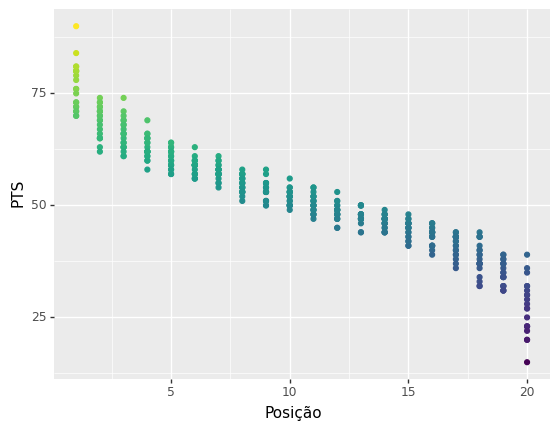

<ggplot: (8734902773950)>

In [7]:
(ggplot(df, aes(x='Posição', y='PTS', color='PTS'))
 + geom_point(show_legend=False)
)

##### Preparando os Dados para ML


In [8]:
x= df[['V','E','D','%','SG','GP','GC']]
y= df['PTS']

In [9]:
random_states = list(range(1, 101))
test_sizes = [0.2, 0.3, 0.4]

best_score = float('-inf')
best_random_state = None
best_test_size = None

for random_state in random_states:
    for test_size in test_sizes:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
        model = DecisionTreeRegressor(random_state=random_state)
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        if score > best_score:
            best_score = score
            best_random_state = random_state
            best_test_size = test_size

print('Melhor random_state:', best_random_state)
print('Melhor test_size:', best_test_size)

Melhor random_state: 89
Melhor test_size: 0.2


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=89)

In [11]:
print('TREINAMENTO:')
print('X:', x_train.shape, 'y:', y_train.shape)
print('TESTE:')
print('X:', x_test.shape, 'y:', y_test.shape)

TREINAMENTO:
X: (320, 7) y: (320,)
TESTE:
X: (80, 7) y: (80,)


##### Definindo Modelo de ML

In [12]:
model = DecisionTreeRegressor(random_state=89)
params = {'criterion': ['squared_error']}

In [13]:
gs= GridSearchCV(model, params, cv=5, refit=True)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=89),
             param_grid={'criterion': ['squared_error']})

In [14]:
gs.cv_results_

{'mean_fit_time': array([0.00444498]),
 'std_fit_time': array([0.00078789]),
 'mean_score_time': array([0.00223947]),
 'std_score_time': array([0.00054709]),
 'param_criterion': masked_array(data=['squared_error'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'squared_error'}],
 'split0_test_score': array([0.99102558]),
 'split1_test_score': array([0.99444732]),
 'split2_test_score': array([0.99393314]),
 'split3_test_score': array([0.97544247]),
 'split4_test_score': array([0.98516574]),
 'mean_test_score': array([0.98800285]),
 'std_test_score': array([0.00709435]),
 'rank_test_score': array([1], dtype=int32)}

##### Fazendo Previsão do Modelo


In [15]:
y_pred = gs.predict(x_test)

In [16]:
y_pred

array([60., 47., 53., 41., 52., 51., 51., 37., 54., 49., 37., 34., 35.,
       41., 59., 62., 39., 53., 57., 46., 80., 62., 54., 73., 57., 41.,
       43., 48., 42., 37., 73., 56., 46., 69., 46., 58., 27., 66., 44.,
       48., 43., 56., 65., 57., 51., 45., 50., 39., 44., 52., 57., 52.,
       70., 57., 46., 31., 53., 59., 55., 50., 50., 59., 71., 48., 57.,
       31., 71., 34., 62., 62., 50., 34., 64., 46., 50., 48., 72., 57.,
       49., 55.])

##### Calculando Métrica de Desempenho

In [17]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.31622776601683794


##### Plotando Gráfico da Árvore Criada no Modelo

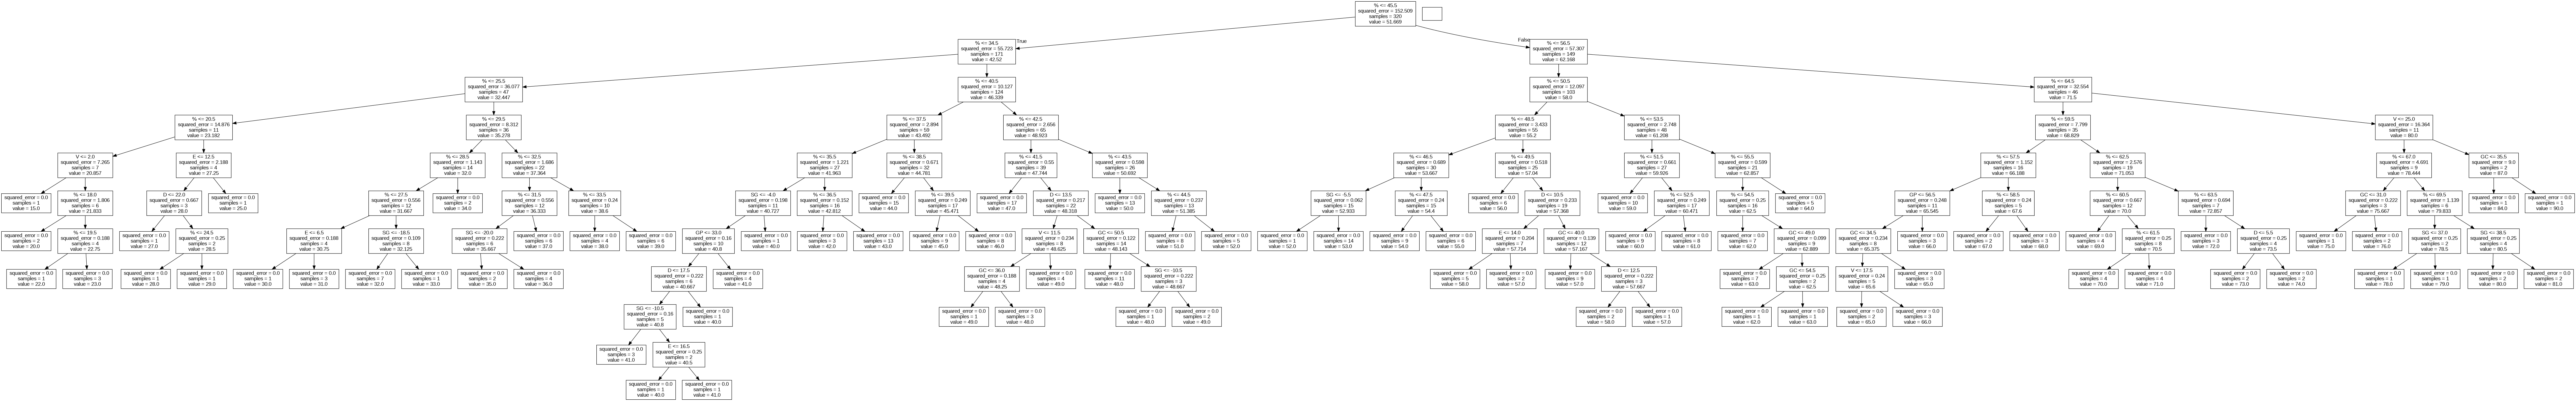

In [18]:
best_model = gs.best_estimator_

dot_data = export_graphviz(best_model, out_file=None, feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())